# Importing Libraries

In [69]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Loading the Dataset

In [11]:
file_path = '/Users/amaanqureshi/Desktop/TB2/text_analytics/twitter-elon-tesla-%20data.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

df.head()

,User,Username,UTC Date,post,Binders,Permalink,reposts,Likes count,Impressions,Quotes,Replies,Bookmarks,post value
0,aHoy,@BrandonLeong3,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,NaN,https://www.twitter.com/user/status/1642315880...,0,0,1257,0,0,0,0.07
1,victoria,@starveiRL,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,NaN,https://www.twitter.com/user/status/1642315850...,0,0,22,0,0,0,0.00
2,Frances Caso,@frances_caso,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,NaN,https://www.twitter.com/user/status/1642315843...,0,1,8,0,0,0,0.00
3,DavidRowe ⧖ - #WATON,@DavidRoweWTL,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,NaN,https://www.twitter.com/user/status/1642315838...,0,3,434,0,1,0,3.39
4,The Green Living Guy,@greenlivingguy,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315816...,1,2,18,0,0,0,14.19


# Data Cleaning

In [80]:
columns_to_keep = ['UTC Date', 'post', 'Likes count', 'Impressions', 'Replies', 'Bookmarks', 'post value']
df_cleaned = df[columns_to_keep]

# Converting UTC Date to datetime
df_cleaned['UTC Date'] = pd.to_datetime(df_cleaned['UTC Date'])

df_cleaned = df_cleaned.dropna(subset=['post'])

df_cleaned.to_excel("processed_twitter_data.xlsx", index=False)

df_cleaned.head()

/var/folders/d0/mczxyfc937qgpb9ppc_kzs740000gn/T/ipykernel_8793/661127025.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Analysing Sentiments

In [13]:
# Calculating sentiment polarity
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df_cleaned['Sentiment Score'] = df_cleaned['post'].apply(calculate_sentiment)

# Categorizing sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_cleaned['Sentiment Category'] = df_cleaned['Sentiment Score'].apply(categorize_sentiment)

In [14]:
# Inspecting with sentiment
df_cleaned[['UTC Date', 'post', 'Sentiment Score', 'Sentiment Category']].head(10)

,UTC Date,post,Sentiment Score,Sentiment Category
0,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,0.000000,Neutral
1,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,0.000000,Neutral
2,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,0.000000,Neutral
3,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,0.250000,Positive
4,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,Neutral
5,2023-04-01 23:59:36,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,Neutral
6,2023-04-01 23:59:34,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,Neutral
7,2023-04-01 23:59:32,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,Neutral
8,2023-04-01 23:59:30,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,Neutral
9,2023-04-01 23:59:26,@bevedoni Look at all the people watching behi...,0.072917,Neutral


# Sentiment Distribution

In [77]:
# Calculate sentiment distribution
sentiment_counts = df_cleaned['Sentiment Category'].value_counts()

custom_colours = {
        'Positive': '#17becf',  # Teal
        'Neutral': '#c7c7c7',   # Gray
        'Negative': '#d62728'   # Red
    }

fig = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Category', 'y': 'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_map = custom_colours
)

# Customizing the layout
fig.update_layout(
    xaxis_title="Sentiment Category",
    yaxis_title="Number of Tweets",
    showlegend=True
)

fig.show()

# Trends Over Time

In [78]:
# Group by date and sentiment category
sentiment_trends = df_cleaned.groupby(['Date', 'Sentiment Category']).size().reset_index(name='Count')

# Create a line chart
fig = px.line(
    sentiment_trends,
    x='Date',
    y='Count',
    color='Sentiment Category',
    title='Sentiment Trends Over Time',
    color_discrete_map = custom_colours
)

# Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Tweets",
    legend_title="Sentiment Category"
)

fig.show()

# Engagement Analysis by Sentiment

In [79]:
# Normalizing metrics
engagement_by_sentiment_normalized = engagement_by_sentiment.copy()
engagement_by_sentiment_normalized.iloc[:, 1:] = engagement_by_sentiment.iloc[:, 1:].div(engagement_by_sentiment.iloc[:, 1:].max())

# Melting the normalized data for visualization
engagement_melted = engagement_by_sentiment_normalized.melt(id_vars='Sentiment Category', var_name='Metric', value_name='Normalized Count')

# Creating a grouped bar chart
fig = px.bar(
    engagement_melted,
    x='Metric',
    y='Normalized Count',
    color='Sentiment Category',
    barmode='group',
    title='Normalized Engagement Metrics by Sentiment',
    color_discrete_map = custom_colours
)

fig.update_layout(
    xaxis_title="Engagement Metric",
    yaxis_title="Normalized Count",
    legend_title="Sentiment Category"
)

fig.show()

# Word Cloud

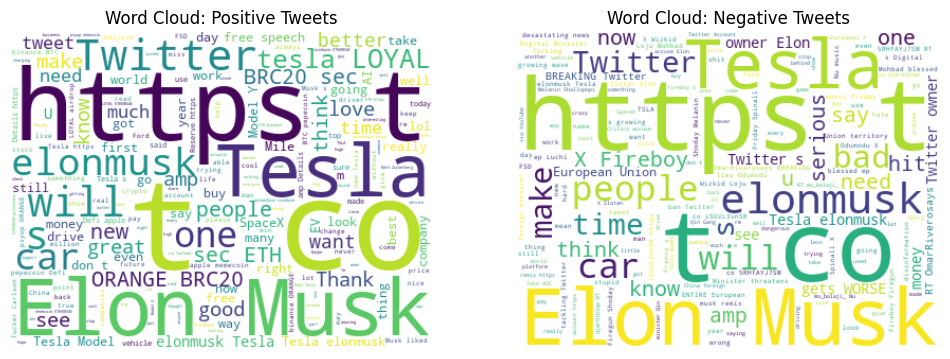

In [75]:
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["elon", "tesla", "musk", "rt", "https", "co", "Elon Musk"])  


positive_tweets = ' '.join(df_cleaned[df_cleaned['Sentiment Category'] == 'Positive']['post'])
negative_tweets = ' '.join(df_cleaned[df_cleaned['Sentiment Category'] == 'Negative']['post'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=300, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud: Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=300, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud: Negative Tweets')
plt.axis('off')
plt.show()